In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_reviews = pd.read_csv('employee_reviews.csv')

In [3]:
df_reviews.sample(5)

,Unnamed: 0,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
39306,39307,apple,none,"Mar 29, 2017",Current Employee - Tech Specialist,Tech Specialist,"Great pay, a lot of room for growth, you can m...",can be a bit challenging to balance with full ...,None at the moment.,5.0,4.0,5.0,5.0,5.0,5.0,0,https://www.glassdoor.com/Reviews/Apple-Review...
472,473,google,none,"May 3, 2018",Former Employee - Anonymous Employee,CEO,Really cool company to run.,Wanted to make some acquisitions that didn't g...,none,5.0,none,none,none,none,none,0,https://www.glassdoor.com/Reviews/Google-Revie...
64070,64071,microsoft,none,"Sep 8, 2016",Former Employee - Anonymous Employee,Good place to work,Get on the right track to get the SW empire ag...,"Lack of stability of jobs. During 2 years, 300...",none,4.0,4.0,4.0,4.0,4.0,4.0,0,https://www.glassdoor.com/Reviews/Microsoft-Re...
61731,61732,microsoft,"Redmond, WA","Jun 11, 2008",Former Employee - Group Test Manager,Loose your work life balance while you satisfy...,Lots of things to do. Good benefits. Lots of c...,"To big and complex. Always a follower, never a...","First, learn how to manage people. Next unders...",2.0,3.0,none,4.0,4.5,2.0,1,https://www.glassdoor.com/Reviews/Microsoft-Re...
13337,13338,amazon,none,"Oct 24, 2017",Current Employee - Anonymous Employee,Hr generalist I,"Super great company, great benefits",Trainers are not very friendly,none,5.0,none,none,none,none,none,0,https://www.glassdoor.com/Reviews/Amazon-Revie...


In [4]:
df_reviews.groupby('company').size()

company
amazon       26430
apple        12950
facebook      1590
google        7819
microsoft    17930
netflix        810
dtype: int64

## Question 1

##### Which company has the highest mean overall-rating score among those 6 companies?

In [5]:
df_overall = df_reviews[['company','overall-ratings']].groupby('company').mean().sort_values('overall-ratings', ascending=False)

In [6]:
df_overall = df_overall.reset_index()

In [7]:
def plot_ratings():
    plt.figure(figsize=(10, 6))
    plt.ylim((3, 4.6))
    plt.bar(df_overall['company'],df_overall['overall-ratings'],width=0.45)
    plt.title('The average overall-rating score of each company')
    
    for x, y in zip(df_overall['company'], df_overall['overall-ratings']):
        plt.text(x, y , '%.2f' % y, ha='center', va='bottom')

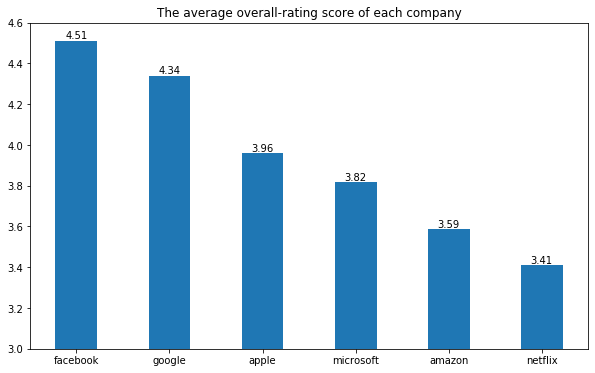

In [8]:
plot_ratings()

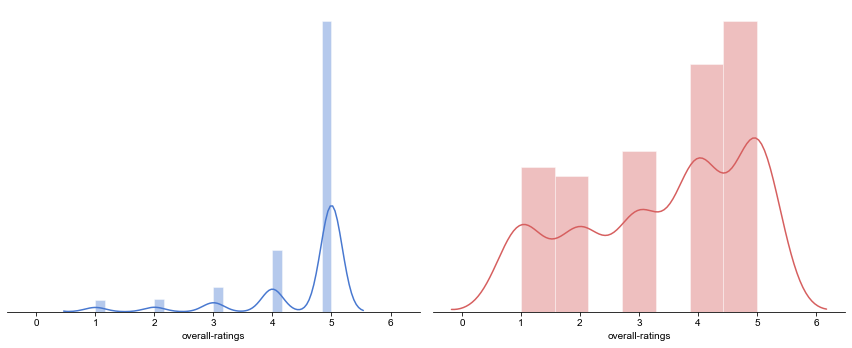

In [9]:
f, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)
sns.despine(left=True)
sns.set(style="white", palette="muted", color_codes=True)

facebook = df_reviews[(df_reviews.company == 'facebook')]['overall-ratings']
sns.distplot(facebook, color="b",ax=axes[0])

netflix = df_reviews[(df_reviews.company == 'netflix')]['overall-ratings']
sns.distplot(netflix, color="r",ax=axes[1])

plt.setp(axes, yticks=[])
plt.tight_layout()

## Question 2  

##### There are five other rating scores, which are work-balance-stars, culture-values-stars, carrer- opportunities-stars, comp-benefit-stars and senior-mangemnet-stars. Try to find the relationship between those five rating scores and the overall-rating score.

 I need to do some data cleaning first in order to exclude reviews without those rating scores. I might use pairplots to help me analyze the question. Then, I’ll use ordinary least squares regression to get more accurate regression results. I’m going to use seaborn and statsmodels.


In [10]:
df_reviews.columns

Index(['Unnamed: 0', 'company', 'location', 'dates', 'job-title', 'summary',
       'pros', 'cons', 'advice-to-mgmt', 'overall-ratings',
       'work-balance-stars', 'culture-values-stars',
       'carrer-opportunities-stars', 'comp-benefit-stars',
       'senior-mangemnet-stars', 'helpful-count', 'link'],
      dtype='object')

In [11]:
df_reviews_heatmap=df_reviews[['overall-ratings','work-balance-stars','culture-values-stars',
                        'carrer-opportunities-stars','comp-benefit-stars',
                        'senior-mangemnet-stars']]

In [12]:
df_reviews_heatmap.shape

(67529, 6)

In [13]:
#Drop rows where ratings are none.
df_reviews_heatmap = df_reviews_heatmap.mask(df_reviews_heatmap.eq('none')).dropna()

In [14]:
#Converting strings to floats 
df_reviews_heatmap = df_reviews_heatmap.apply(pd.to_numeric, errors='ignore')

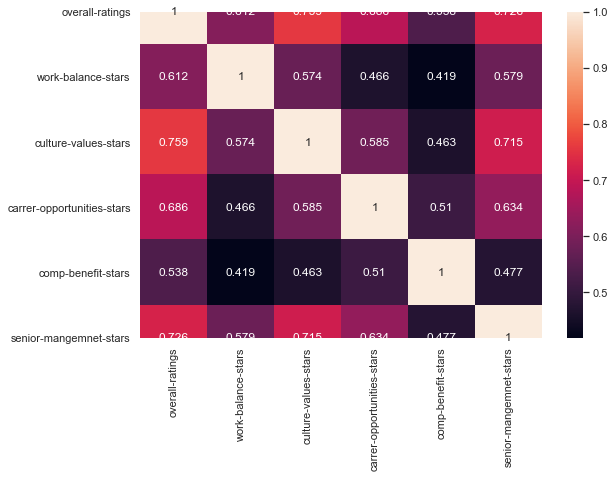

In [24]:
f, ax = plt.subplots(1,1,figsize=(9, 6))
sns.heatmap(df_reviews_heatmap[['overall-ratings','work-balance-stars','culture-values-stars',
                        'carrer-opportunities-stars','comp-benefit-stars',
                        'senior-mangemnet-stars']].corr(method='pearson'),annot = True,fmt='.3g')

In [36]:
df_reviews_heatmap.columns=['overall_ratings','work_balance_stars','culture_values_stars',
                            'carrer_opportunities_stars','comp_benefit_stars','senior_mangemnet_stars']

In [37]:
model1 = smf.ols('overall_ratings ~ work_balance_stars + culture_values_stars + carrer_opportunities_stars  + comp_benefit_stars + senior_mangemnet_stars'
                 , data=df_reviews_heatmap).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        overall_ratings   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                 2.650e+04
Date:                Tue, 17 Dec 2019   Prob (F-statistic):               0.00
Time:                        23:26:41   Log-Likelihood:                -50232.
No. Observations:               53222   AIC:                         1.005e+05
Df Residuals:                   53216   BIC:                         1.005e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.3860      0.011     33.990      0.000       0.364       0.408
work_balance_stars             0.1298      0.003     48.922      0.000       0.125       0.135
culture_values_stars           0.3159      0.003     99.147      0.000       0.310       0.322
carrer_opportunities_stars     0.2277      0.003     75.014      0.000       0.222       0.234
comp_benefit_stars             0.1110      0.003     35.551      0.000       0.105       0.117
senior_mangemnet_stars         0.1658      0.003     50.681      0.000       0.159       0.172
==============================================================================
Omnibus:                     2701.070   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9810.491
Skew:                          -0.114   Prob(JB):                         0.00
Kurtosis:                       5.091   Cond. No.                         36.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Question 3

In [38]:
import re
import os
from spacy.lang.en.stop_words import STOP_WORDS

In [39]:
companys = ['facebook','google','apple','netflix','amazon','microsoft']

In [40]:
facebook= df_reviews[(df_reviews.company == 'facebook')][['pros','cons','advice-to-mgmt']]
facebook = facebook.mask(facebook.eq('none')).dropna().reset_index()

In [41]:
google= df_reviews[(df_reviews.company == 'google')][['pros','cons','advice-to-mgmt']]
google = google.mask(google.eq('none')).dropna().reset_index()

In [42]:
apple= df_reviews[(df_reviews.company == 'apple')][['pros','cons','advice-to-mgmt']]
apple = apple.mask(apple.eq('none')).dropna().reset_index()

In [43]:
netflix= df_reviews[(df_reviews.company == 'netflix')][['pros','cons','advice-to-mgmt']]
netflix = netflix.mask(netflix.eq('none')).dropna().reset_index()

In [44]:
amazon= df_reviews[(df_reviews.company == 'amazon')][['pros','cons','advice-to-mgmt']]
amazon= amazon.mask(amazon.eq('none')).dropna().reset_index()

In [45]:
microsoft= df_reviews[(df_reviews.company == 'microsoft')][['pros','cons','advice-to-mgmt']]
microsoft = microsoft.mask(microsoft.eq('none')).dropna().reset_index()

In [46]:
company_comments=[]
for j in range(len(companys)):
    comments = []
    pros = []
    cons = []
    advice = []
    tmp = eval('%s'%companys[j])
    for i in range(len(tmp)):
        pros.append(tmp['pros'][i])
        cons.append(tmp['cons'][i])
        advice.append(tmp['advice-to-mgmt'][i])
    comments.append(pros)
    comments.append(cons)
    comments.append(advice)
    company_comments.append(comments)

In [47]:
otherwords = ['facebook','google','apple','netflix','amazon','microsoft','company']
for word in otherwords:
    STOP_WORDS.add(word)

In [48]:
#Remove punctuation and any other non-alphabet characters
#Remove stopwords
df_nostop = []
temp = []
for i in range(len(companys)):
    for j in range(3):
        for k in range(len(company_comments[i][0])):
            company_comments[i][j][k] = company_comments[i][j][k].lower()
            company_comments[i][j][k] = re.sub(r'[^\w\s]', '', company_comments[i][j][k])
            company_comments[i][j][k] = company_comments[i][j][k].replace('_', "")
            company_comments[i][j][k] = re.sub(r'[0-9]+', " ",company_comments[i][j][k])
            for word in company_comments[i][j][k].split():
                if word not in STOP_WORDS:
                    temp.append(word)
            company_comments[i][j][k] = " ".join(temp)
            temp = []
            

In [49]:
import os
from os import path
from wordcloud import WordCloud

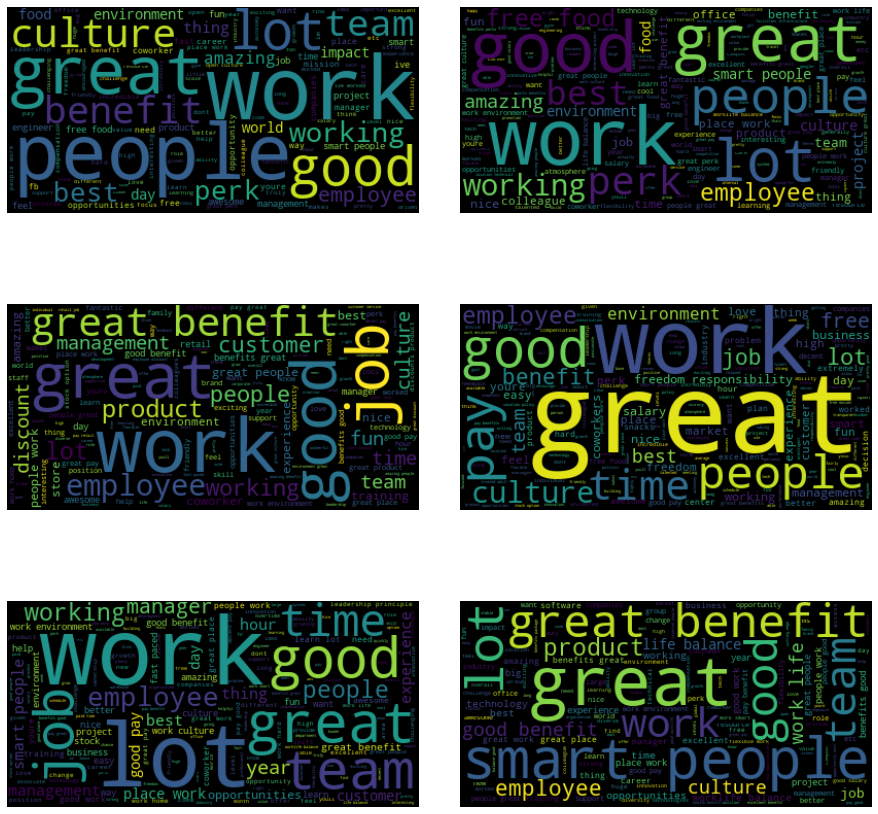

In [50]:
plt.subplots_adjust(left=3,right=5,bottom=2,top=5,hspace=0.1, wspace=0.1)

for i in range(6):
    plt.subplot(3,2,i+1)
    wordcloud = WordCloud().generate(" ".join(company_comments[i][0]))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

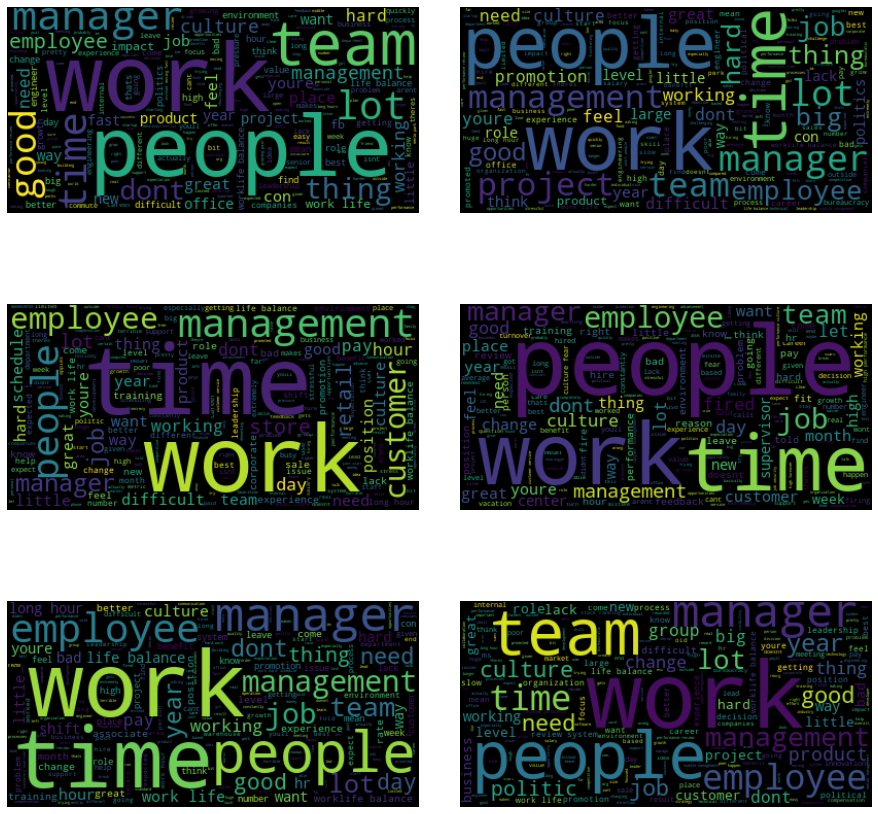

In [51]:
plt.subplots_adjust(left=3,right=5,bottom=2,top=5,hspace=0.1, wspace=0.1)

for i in range(6):
    plt.subplot(3,2,i+1)
    wordcloud = WordCloud().generate(" ".join(company_comments[i][1]))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

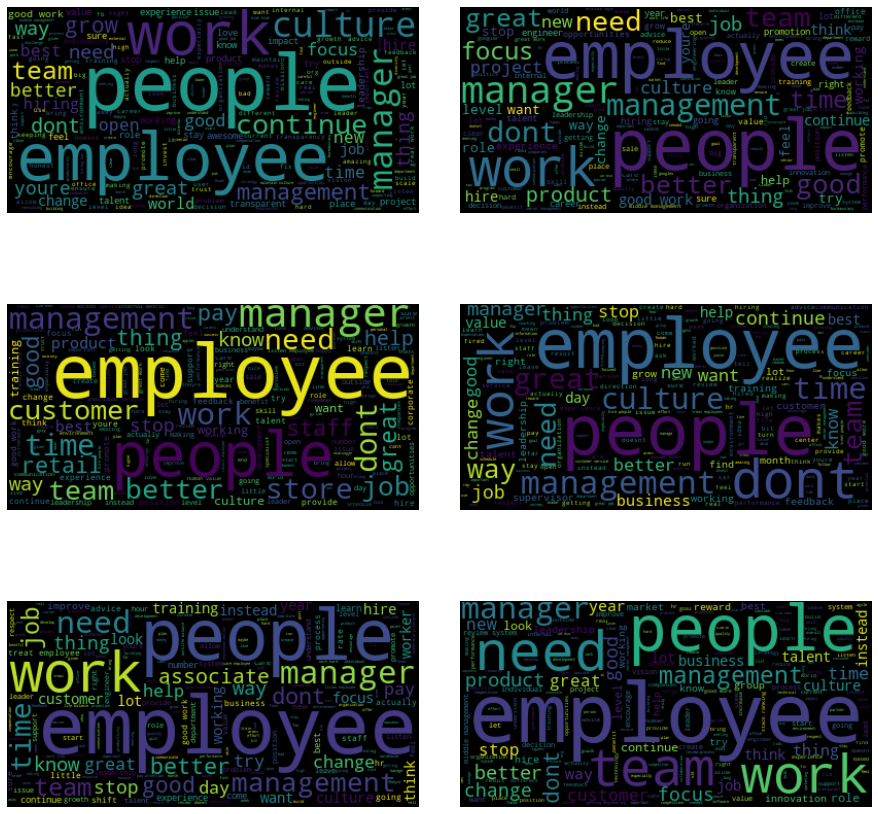

In [52]:
plt.subplots_adjust(left=3,right=5,bottom=2,top=5,hspace=0.1, wspace=0.1)

for i in range(6):
    plt.subplot(3,2,i+1)
    wordcloud = WordCloud().generate(" ".join(company_comments[i][2]))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

## Question 4

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
df_reviews_predict=df_reviews[['overall-ratings','work-balance-stars','culture-values-stars',
                        'carrer-opportunities-stars','comp-benefit-stars',
                        'senior-mangemnet-stars']]

In [55]:
df_reviews_predict = df_reviews_predict.mask(df_reviews_predict.eq('none')).dropna()
df_reviews_predict = df_reviews_predict.convert_objects(convert_numeric=True)

AttributeError: 'DataFrame' object has no attribute 'convert_objects'

In [ ]:
df_train,df_test = train_test_split(df_reviews_predict, test_size=0.3)

In [ ]:
len(df_train),len(df_test)

### Regression : Ordinary Least Squares Regression

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(df_train.ix[:,1:6],df_train['overall-ratings'])

In [ ]:
predicted_labels = reg.predict(df_test.ix[:,1:6])
df_test['predicted_reg'] = np.round(predicted_labels)

In [ ]:
df_test_test = df_test.reset_index()
count = 0
for i in range(len(df_test_test)):
    if df_test_test['overall-ratings'][i]== df_test_test['predicted_reg'][i]:
        count +=1
count/len(df_test_test)

### Decision Trees

In [ ]:
import sklearn.tree as sktree

In [ ]:
dt_model = sktree.DecisionTreeClassifier(criterion='entropy')
# given first 4 columns, learn the species
dt_model.fit(df_train.ix[:,1:6],df_train['overall-ratings'])

# this is testing the model 
predicted_labels = dt_model.predict(df_test.ix[:,1:6])
df_test['predicted_label_tree'] = predicted_labels
dt_model.score(df_test.ix[:,1:6],df_test['overall-ratings'])

In [ ]:
# Check feature importance
# Visualize the importances
feat_importance = dt_model.feature_importances_
pd.DataFrame({'Feature Importance':feat_importance},
            index=df_train.ix[:,1:6].columns).plot(kind='barh',figsize=(6,5))

### Random Forest

In [ ]:
import sklearn.ensemble as skens
from sklearn.model_selection import GridSearchCV

In [ ]:
rf_model = skens.RandomForestClassifier(n_estimators=10,oob_score=True, criterion='entropy')
rf_model.fit(df_train.ix[:,1:6],df_train['overall-ratings'])

In [ ]:
predicted_labels = rf_model.predict(df_test.ix[:,1:6])
df_test['predicted_rf_tree'] = predicted_labels

In [ ]:
param_grid = {
                 'n_estimators': [5, 10, 15, 20, 25],
                 'max_depth': [2, 5, 7, 9],
             }

grid_clf = GridSearchCV(rf_model, param_grid, cv=10)
grid_clf.fit(df_train.ix[:,1:6],df_train['overall-ratings'])
grid_clf.best_estimator_

In [ ]:
tuned_model = grid_clf.best_estimator_
tuned_model.fit(df_train.ix[:,1:6],df_train['overall-ratings'])
tuned_model.score(df_test.ix[:,1:6],df_test['overall-ratings'])

In [ ]:
# Check feature importance
# Visualize the importances
feat_importance = tuned_model.feature_importances_
pd.DataFrame({'Feature Importance':feat_importance},
            index=df_train.ix[:,1:6].columns).plot(kind='barh',figsize=(6,5))

### Naive Bayes 
Four approaches

In [ ]:
import sklearn.naive_bayes as sknb
gnb_model = sknb.GaussianNB()
gnb_model.fit(df_train.ix[:,1:6],df_train['overall-ratings'])

In [ ]:
y_pred = gnb_model.predict(df_test.ix[:,1:6])
df_test['predicted_nb'] = y_pred
gnb_model.score(df_test.ix[:,1:6],df_test['overall-ratings'])

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb_model = MultinomialNB()
mnb_model.fit(df_train.ix[:,1:6],df_train['overall-ratings'])

In [ ]:
y_prediction = mnb_model.predict(df_test.ix[:,1:6])
df_test['predicted_mnb'] = y_prediction
mnb_model.score(df_test.ix[:,1:6],df_test['overall-ratings'])

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb_model = BernoulliNB()
bnb_model.fit(df_train.ix[:,1:6],df_train['overall-ratings'])

In [ ]:
y_prediction = mnb_model.predict(df_test.ix[:,1:6])
df_test['predicted_bnb'] = y_prediction
bnb_model.score(df_test.ix[:,1:6],df_test['overall-ratings'])

In [ ]:
from sklearn.naive_bayes import ComplementNB
cnb_model = ComplementNB()
cnb_model.fit(df_train.ix[:,1:6],df_train['overall-ratings'])

In [ ]:
y_prediction = cnb_model.predict(df_test.ix[:,1:6])
df_test['predicted_cnb'] = y_prediction
cnb_model.score(df_test.ix[:,1:6],df_test['overall-ratings'])

### Neural network models
Multi-layer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier()
mlp_model.fit(df_train.ix[:,1:6],df_train['overall-ratings']) 

In [ ]:
y_prediction = mlp_model.predict(df_test.ix[:,1:6])
df_test['predicted_mlp'] = y_prediction
mlp_model.score(df_test.ix[:,1:6],df_test['overall-ratings'])

In [ ]:
model_accuracy={'Regression':0.6332,'Decision Trees':0.6334,'Random Forest':0.6451,'Naive Bayes_GNB':0.6336,
                'Naive Bayes_MNB':0.3730,'Naive Bayes_BNB':0.3503,'Naive Bayes_CNB':0.3841,"Neural network":0.6437}
df = pd.DataFrame(list(model_accuracy.items()),columns=['Method', 'Value'])

In [ ]:
df = df.sort_values(by=['Value'])

In [ ]:
plt.style.use('grayscale')
plt.figure(figsize=(16,5))
plt.title("Model Accuracy")
plt.xlabel("Method")
plt.ylabel("Accuracy")
plt.plot(df['Method'],df['Value'],color='r')
plt.legend()
plt.grid(True)